# Part 1: Data Processing

## Task 1:

### Clean the text

In [24]:
import re
from cleantext import clean

# Clean the data
def clean_text(text):         
    # Replace dates with <DATE> (assuming date format MM DD,YYYY (fx Jan. 8, 2017 or april 4, 1999))
    text = re.sub('(?:[a-zA-Z]+)\.?\s+[0-9]{1,2},\s+[0-9]{4}', '<DATE>', text)

    # Remove multiple white spaces, tabs, new lines
    text = re.sub(' +|\n+|\t+',' ', text)
    
    text = clean(text,
        lower=True,                    # lowercase text
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_numbers=True,               # replace all numbers with a special token      
        replace_with_url="<URL>",
        replace_with_email="<EMAIL>",
        replace_with_number="<NUM>"            
    )

    return text

In [25]:
import pandas as pd

# load news_sample.csv file from git source
df = pd.read_csv('https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv')

# cleanup text on 'content' column and add into new column 'content_clean'
df['content_clean'] = df['content'].apply(clean_text)

# save cleaned up data to csv file
df.to_csv("data/news_sample_cleaned.csv")

pd.reset_option('display.max_rows')
pd.set_option('display.max_colwidth', 150)

print(df["content_clean"])

0      sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the posi...
1      awakening of <num> strands of dna - "reconnecting with you" movie % of readers think this story is fact. add your two cents. headline: bitcoin & b...
2      never hike alone: a friday the 13th fan film usa | <num> | <num> min a fan tribute to friday the 13th, never hike alone follows an adventure never...
3      when a rare shark was caught, scientists were left blundering for answers. this shark has a unique feature. and it's not that it can survive at ex...
4      donald trump has the unnerving ability to ability to create his own reality and convince millions of americans that what he says it is true. the p...
                                                                               ...                                                                          
245    prison for rahm, god's work and many others headlin

## NLTK

In [26]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\Phong
[nltk_data]     Phan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Phong
[nltk_data]     Phan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.tokenize import word_tokenize

# tokenize the text
# THIS IS NOT IN USE FOR NOW
def tokenize_text(text: str) -> list:
    return word_tokenize(text)


### Tokenize the text and remove stopwords

In [29]:
from nltk.corpus import stopwords

def remove_stopwords(text: str) -> None:
    stop_words = set(stopwords.words('english'))

    # Tokenize the input text
    word_tokens = word_tokenize(text)

    # Filter out stopwords
    filtered_sentence = [w for w in word_tokens if w.lower() not in stop_words]

    # Join the filtered words back into a single string
    nostop_text = ' '.join(filtered_sentence)

    return nostop_text

# Apply remove_stopwords to 'content_clean' column and create 'content_stopword' column
df['content_stopword'] = df['content_clean'].apply(remove_stopwords)
print(df['content_stopword'])


0      sometimes power christmas make wild wonderful things . need believe holy trinity believe positive power good others . simple act giving without re...
1      awakening < num > strands dna - `` reconnecting '' movie % readers think story fact . add two cents . headline : bitcoin & blockchain searches exc...
2      never hike alone : friday 13th fan film usa | < num > | < num > min fan tribute friday 13th , never hike alone follows adventure never hike alone ...
3      rare shark caught , scientists left blundering answers . shark unique feature . 's survive extreme depths live extended period time . shark 's uni...
4      donald trump unnerving ability ability create reality convince millions americans says true . problem president lying believes lies . new poll sho...
                                                                               ...                                                                          
245    prison rahm , god 's work many others headline : bi

###  Compute the size of the vocabulary and compute the reduction rate of the vocabulary size after removing stopwords


In [20]:
# compute stopword reduction rate. add vocabulary columns and reduction rate column to csv file
def stopword_reduction_rate(filename: str) -> None:
    df = pd.read_csv(filename)

    for i in range(len(df.index)):
        content_clean_vocabulary_size = len(set(word_tokenize(df.content_clean[i])))
        content_stopword_vocabulary_size = len(set(word_tokenize(df.content_stopword[i])))
        decrease = content_clean_vocabulary_size - content_stopword_vocabulary_size
        reduction_rate = (decrease/content_clean_vocabulary_size) * 100
        df.at[i, 'content_clean_vocabulary_size'] = content_clean_vocabulary_size
        df.at[i, 'content_stopword_vocabulary_size'] = content_stopword_vocabulary_size
        df.at[i, 'content_stopword_reduction_rate'] = round(reduction_rate, 3)
    
    df.to_csv(filename)

    # # Printing results for each row
    # for index, row in df.iterrows():
    #     print(f"{index} Clean Vocab Size: {row['content_clean_vocabulary_size']}, Stopword Vocab Size: {row['content_stopword_vocabulary_size']}, Reduction Rate: {row['content_stopword_reduction_rate']}")
    
stopword_reduction_rate('data/news_sample_cleaned.csv')



### Remove word variations with stemming and compute the size of the vocabulary

In [21]:
from nltk.stem.snowball import SnowballStemmer

# remove word variations

def remove_word_variations(text: str) -> str:
    # Initialize a SnowballStemmer with English language
    stemmer = SnowballStemmer("english")
    
    # Tokenize the input text
    word_tokens = word_tokenize(text)
    
    # Stem each word token
    stemmed_words = [stemmer.stem(word) for word in word_tokens]
    
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

df['content_stem'] = df['content_stopword'].apply(remove_word_variations)
print(df['content_stem'])

0      sometim power christma make wild wonder thing . need believ holi triniti believ posit power good other . simpl act give without receiv lost mani u...
1      awaken < num > strand dna - `` reconnect `` movi % reader think stori fact . add two cent . headlin : bitcoin & blockchain search exceed trump ! b...
2      never hike alon : friday 13th fan film usa | < num > | < num > min fan tribut friday 13th , never hike alon follow adventur never hike alon : frid...
3      rare shark caught , scientist left blunder answer . shark uniqu featur . 's surviv extrem depth live extend period time . shark 's uniqu trait ext...
4      donald trump unnerv abil abil creat realiti convinc million american say true . problem presid lie believ lie . new poll show get countri deep tro...
                                                                               ...                                                                          
245    prison rahm , god 's work mani other headlin : bitc

###  Compute the reduction rate of the vocabulary size after stemming

In [22]:
# compute size of vocabulary after stemming. Add column with 'stem vocabulary size' to the csv file
def stemming_reduction_rate(filename: str) -> None:
    df = pd.read_csv(filename)

    for i in range(len(df.index)):
        stem_vocabulary_size = len(set(word_tokenize(df.content_stem[i])))
        clean_vocabulary_size = len(set(word_tokenize(df.content_clean[i])))
        decrease = clean_vocabulary_size - stem_vocabulary_size
        reduction_rate = (decrease/clean_vocabulary_size) * 100
        df.at[i, 'content_stem_vocabulary_size'] = stem_vocabulary_size
        df.at[i, 'content_stem_reduction_rate'] = round(reduction_rate, 3)

    df.to_csv(filename)
    # # Printing results for each row
    # for index, row in df.iterrows():
    #     print(f"{index} Clean Vocab Size: {row['content_clean_vocabulary_size']}, Stopword Vocab Size: {row['content_stopword_vocabulary_size']}, Reduction Rate: {row['content_stopword_reduction_rate']}, Stem Vocabulary Size: {row['content_stem_vocabulary_size']}, Stem Reduction Rate: {row['content_stem_reduction_rate']}")

stemming_reduction_rate('data/news_sample_cleaned.csv')

## Task 2:

### Make at least three non-trivial observations/discoveries about the data

In [1]:
import pandas as pd

# Load the dataset
df_new = pd.read_csv('data/995,000_rows.csv')


C:\Users\Phong Phan\AppData\Local\Temp\ipykernel_9616\4225813378.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Phong Phan\AppData\Local\Temp\ipykernel_9616\4225813378.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new = pd.read_csv('data/995,000_rows.csv')


In [4]:
# print("Basic Statistics of the Dataset:")
# print(df.info())

# # Missing Values
# print("\nMissing Values in Each Column:")
# print(df.isnull().sum())

# Handle NaN values in the 'content' column
df_new['content'] = df_new['content'].fillna('')
      
# Apply clean_text function
df_new['content_clean'] = df_new['content'].apply(clean_text)

In [8]:
# Function to count URLs with <URL> tag
def count_urls_with_tag(text):
    urls_with_tag = re.findall('<url>', text)
    return len(urls_with_tag)

# Apply count URLs with <URL> tag
df_new['url_count'] = df_new['content_clean'].apply(count_urls_with_tag)

# print(df[['content_clean', 'url_count_with_tag']])

# Total URLs in Content
total_urls = df_new['url_count'].sum()
print("Total URLs in Content:", total_urls)

Total URLs in Content: 265730


In [11]:
# Function to count DATEs with <DATE> tag
def count_date_with_tag(text):
    date_with_tag = re.findall('<date>', text)
    return len(date_with_tag)

# Apply count DATEs with <DATE> tag
df_new['date_count'] = df_new['content_clean'].apply(count_date_with_tag)

# Total DATEs in Content
total_dates = df_new['date_count'].sum()
print("Total DATEs in Content:", total_dates)

Total DATEs in Content: 366961


In [12]:

# Function to count NUMs with <NUM> tag
def count_num_with_tag(text):
    num_with_tag = re.findall('<num>', text)
    return len(num_with_tag)

# Apply count NUms with <NUM> tag
df_new['num_count'] = df_new['content_clean'].apply(count_num_with_tag)

# Total NUMs in Content
total_nums = df_new['num_count'].sum()
print("Total NUMs in Content:", total_nums)

Total NUMs in Content: 7847913


[('the', 26221386), ('to', 12684748), ('of', 12490129), ('and', 11511566), ('a', 10029617), ('in', 8719299), ('num', 7847998), ('that', 5672981), ('is', 5073090), ('s', 4945541), ('for', 4385320), ('it', 3631064), ('on', 3529588), ('with', 2833050), ('as', 2804461), ('i', 2597019), ('was', 2446702), ('are', 2443949), ('by', 2351211), ('this', 2287046), ('you', 2243796), ('at', 2197873), ('be', 2175310), ('he', 2172500), ('not', 2114533), ('have', 2099297), ('from', 2042185), ('they', 1733395), ('an', 1724729), ('has', 1709394), ('we', 1699856), ('but', 1653709), ('his', 1632367), ('or', 1534996), ('said', 1415656), ('who', 1355900), ('will', 1333746), ('their', 1269891), ('t', 1236015), ('all', 1193483), ('more', 1161332), ('one', 1119519), ('about', 1108291), ('new', 1063568), ('which', 1027472), ('can', 1005473), ('if', 1002649), ('up', 978733), ('would', 965366), ('what', 953211), ('there', 926751), ('been', 925156), ('had', 915900), ('were', 915087), ('people', 912579), ('so', 8814

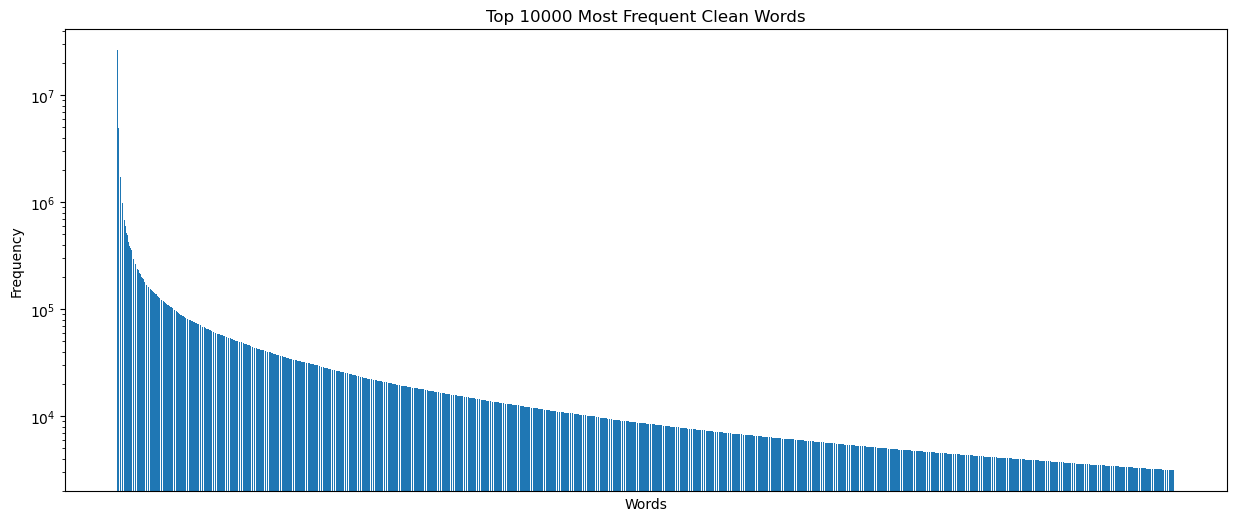

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

# Initialize an empty counter to store word frequencies
clean_word_freq = Counter()

# Iterate over each row of the DataFrame
for _, row in df_new.iterrows():
    # Join the clean words in the 'content_clean' column of the current row into a single string
    clean_text = ' '.join(re.findall(r'\b\w+\b', row['content_clean']))
    
    # Count the word frequencies for the current row
    clean_word_freq.update(clean_text.split())

# Sort the word frequencies in descending order
sorted_clean_word_freq = sorted(clean_word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the 100 most frequent words
top_100_clean_words = sorted_clean_word_freq[:100]

# Print the top 100 most frequent words
print(top_100_clean_words)

# Extract the 10000 most frequent words
top_10000_clean_words = sorted_clean_word_freq[:10000]

# Barplot for top 10000 most frequent clean words
plt.figure(figsize=(15, 6))
words, frequencies = zip(*top_10000_clean_words)
plt.bar(words, frequencies)
plt.yscale('log')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10000 Most Frequent Clean Words')
plt.xticks([])
plt.show()

In [31]:
# Apply remove_stopwords to 'content_clean' column and create 'content_stopword' column
df_new['content_stopword'] = df_new['content_clean'].apply(remove_stopwords)

In [ ]:
df_new['content_stem'] = df_new['content_stopword'].apply(remove_word_variations)

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Initialize an empty counter to store word frequencies
clean_word_freq_after = Counter()

# Iterate over each row of the DataFrame
for _, row in df_new.iterrows():
    # Join the clean words in the 'content_clean' column of the current row into a single string
    clean_text_after = ' '.join(re.findall(r'\b\w+\b', row['content_stem']))
    
    # Count the word frequencies for the current row
    clean_word_freq_after.update(clean_text.split())

# Sort in descending order
sorted_clean_word_freq_after = sorted(clean_word_freq_after.items(), key=lambda x: x[1], reverse=True)

# Extract the 100 most frequent words
top_100_clean_words_after = sorted_clean_word_freq_after[:100]

for word, frequency in top_100_clean_words_after:
    print(f"{word}: {frequency}")

# Extract the 10000 most frequent words
top_10000_clean_words_after = sorted_clean_word_freq_after[:10000]

# Barplot for top 10000 most frequent clean words
plt.figure(figsize=(12, 6))
words, frequencies = zip(*top_10000_clean_words_after)
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10000 Most Frequent Clean Words After Preprocessing')
plt.xticks([])
plt.show()